In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn
import seaborn as sns
from sklearn import neighbors
%matplotlib inline

In [25]:
df = pd.read_csv(r'C:\Users\harr1\Desktop\Thinkful\heart.csv')

print(df.head(3))
print (len(df))

print(df.dtypes)


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
303
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


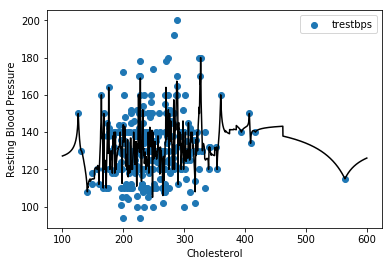

In [26]:
knn = neighbors.KNeighborsRegressor (n_neighbors = 5, weights = 'distance')


X = pd.DataFrame(df['chol']) #pd.DataFrame corrects a reshaping issue
Y = df.trestbps
knn.fit(X,Y)

T = np.arange(100, 600, 0.1)[:, np.newaxis]

Y_ = knn.predict(T)

plt.scatter(X, Y)
plt.plot(T, Y_, color = 'black')
plt.xlabel('Cholesterol')
plt.ylabel('Resting Blood Pressure')
plt.legend()
plt.show()

## KNN regression doesn't seem helpful for this data. 


Coefficients: 
 [0.04167886]
Intercept: 
 121.35975749430592


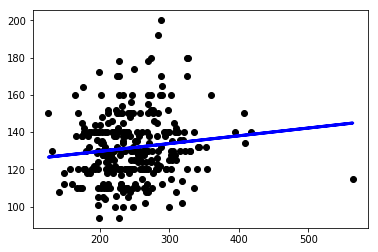

In [27]:
from sklearn import linear_model
regr = linear_model.LinearRegression()


regr.fit(X, Y)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# Plot outputs
plt.scatter(X, Y, color='black')
plt.plot(X, regr.predict(X), color='blue', linewidth=3)
plt.show()

##It appears a Multivatiate Linear regression gives a straight line but since the data is all over the place neither model
seems to allow for any significant findings

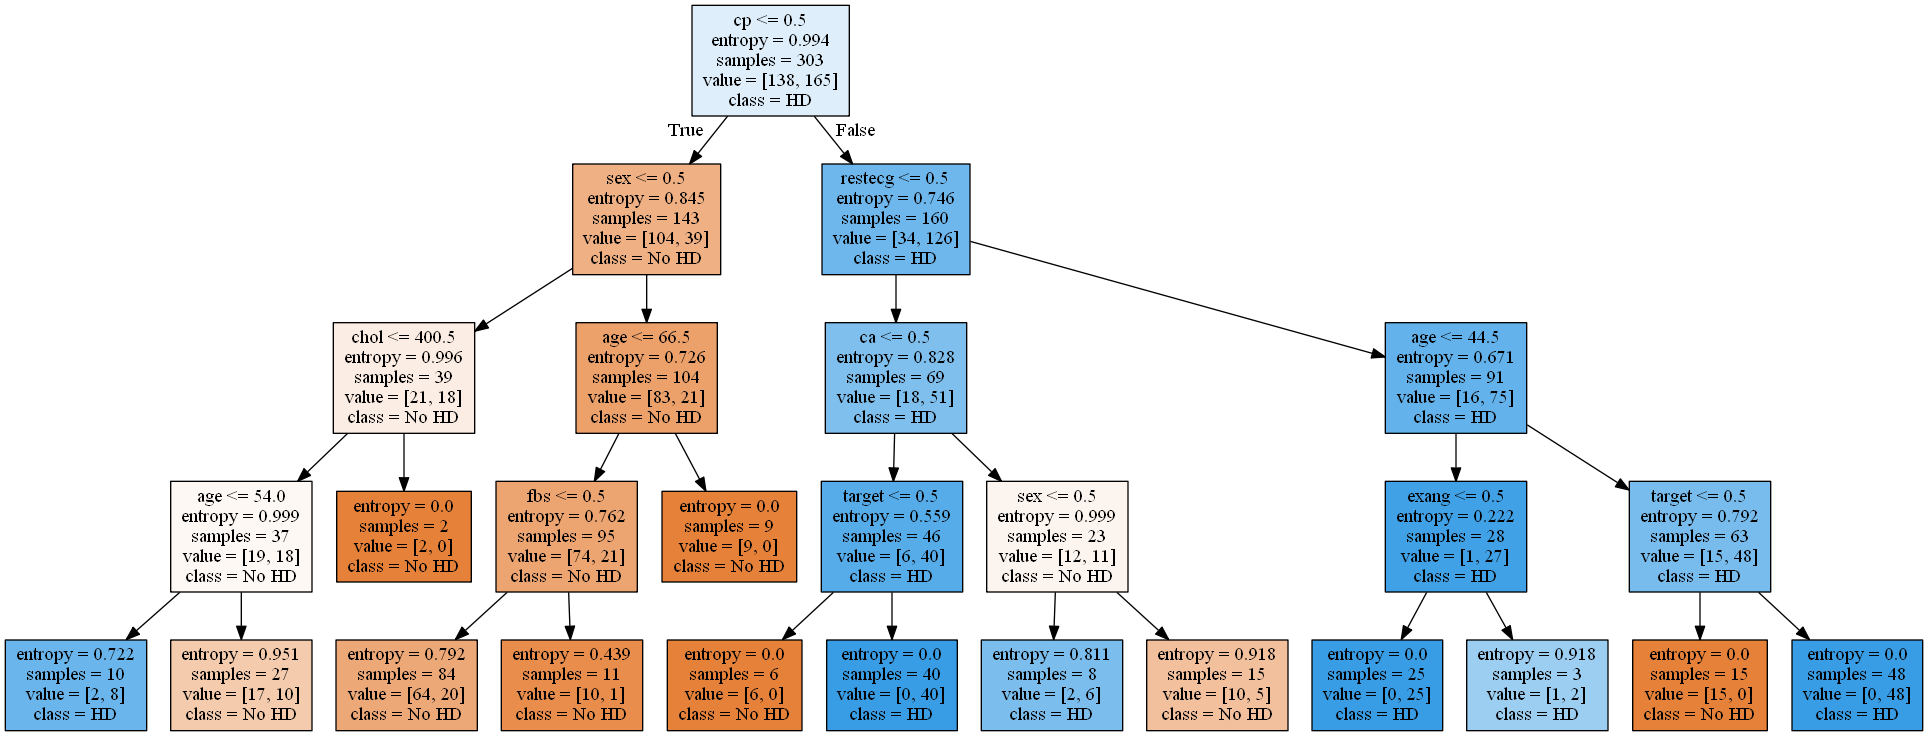

In [68]:
from sklearn import tree

from IPython.display import Image

import pydotplus
import graphviz

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 25
)
decision_tree.fit(df, df['target'])


dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=df.columns,
    class_names=['No HD', 'HD'],
    filled=True
)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())


In [69]:
import time
start_time = time.perf_counter()
print("--- %s seconds ---" % (time.perf_counter() - start_time))


--- 3.813599960267311e-05 seconds ---


Seems to sort Heart Disease Vs Not Heart Disease accurately.

In [61]:
print(f'Model Accuracy: {decision_tree.score(X, Y)}')


Model Accuracy: 0.8646864686468647


##If I trained the model, why isn't it perfect? Because I limited the depth of the tree.

In [66]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier(n_estimators = 100)
X = df
Y = df['target']

cross_val_score(rfc, X, Y, cv=10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Model is perfect because it is using training data. This is overfitting but had I divided training and testing sets, The accuracy would not be perfect.

In [67]:
import time
start_time = time.perf_counter()
print("--- %s seconds ---" % (time.perf_counter() - start_time))

--- 5.701499958377099e-05 seconds ---


The random forest  is slower but has better accuracy and reduced bias based on the random sampling of the data